<a href="https://colab.research.google.com/github/rsotop/Anal-tica-de-negocio/blob/main/Lab_Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocesamiento de datos 
En este laboratorio, configuraremos una **canalización de datos** (*data pipeline*) para dejar los datos listos para el análisis. El preprocesamiento de datos tiende a ser, con mucho, el paso que consume más tiempo del proceso de ciencia de datos. Los errores en este paso se propagan al modelo, por lo que es muy importante que lo hagamos correctamente.

El objetivo de este paso es dejar los datos listos para la aplicación de modelos.

Cada problema tiene su propio conjunto de funciones de preprocesamiento de datos para aplicarlo, pero nos centraremos en las más comunes en los modelos de clasificación. En general queremos:

1. Eliminar variables redundantes.
2. Tratar valores nulos.
3. Tratar los valores atípicos.
4. Eliminar entidades correlacionadas.

Para este objetivo, utilizaremos el excelente paquete [```scikit-learn```](https://scikit-learn.org/stable/) , que viene con la mayoría de las operaciones de uso intensivo de datos. También usaremos hoy (y durante el resto del módulo) el paquete [```pandas```](https://pandas.pydata.org/), que permite el manejo de datos en general.

Lectura de los datos 
Descarguemos los datos de Bankloan. Lo he modificado ligeramente eliminando la información de PD y LGD (ya que ahora estimaremos la nuestra). Como recordatorio, tiene las siguientes variables:

- Cliente: ID, o etiqueta única, del prestatario (NO predictivo).
- Edad: Edad del prestatario en años.
- Educación: Máximo nivel de educación alcanzado por el prestatario. 1: Primaria completa. 2: Secundaria completa. 3: Educación Superior Incompleta. 4: Educación superior completa. 5: Con estudios de posgrado (MSc o PhD completos).
- Empleo: Años en el trabajo actual.
- Dirección: Años en la dirección actual.
- Ingresos: Ingresos en '000s USD.
- Apalancamiento: Relación Deuda/Ingresos.
- CredDebt: deuda permanente de la tarjeta de crédito.
- OthDebt: Otra deuda en '000s USD.
- MonthlyLoad: Porcentaje mensual del salario utilizado para pagar deudas.
- Predeterminado: 1 si se ha producido un incumplimiento, 0 si no (variable de destino).

Lo descargaremos ahora directamente desde un enlace, usando el comando más obicuo [```wget```](http://www.gnu.org/software/wget/). El comando es

```
wget [-options] path
```

Necesitamos agregar las opciones ```--no-check-certificate``` y ```--output-document=FILENAME``` así se descarga ok.

In [2]:
!wget --no-check-certificate --output-document=Bankloan.csv 'https://docs.google.com/spreadsheets/d/1nUJ1fA5f1VeMvulknpsvxpy0GW3CekNnhgeLRK0WlDI/export?gid=1016776666&format=csv'

--2022-04-11 02:37:15--  https://docs.google.com/spreadsheets/d/1nUJ1fA5f1VeMvulknpsvxpy0GW3CekNnhgeLRK0WlDI/export?gid=1016776666&format=csv
Resolving docs.google.com (docs.google.com)... 173.194.217.100, 173.194.217.113, 173.194.217.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.100|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0o-8s-sheets.googleusercontent.com/export/70cmver1f290kjsnpar5ku2h9g/4cesd57up38eik944bn78u4etg/1649644635000/102123285539774178265/*/1nUJ1fA5f1VeMvulknpsvxpy0GW3CekNnhgeLRK0WlDI?gid=1016776666&format=csv [following]
--2022-04-11 02:37:15--  https://doc-0o-8s-sheets.googleusercontent.com/export/70cmver1f290kjsnpar5ku2h9g/4cesd57up38eik944bn78u4etg/1649644635000/102123285539774178265/*/1nUJ1fA5f1VeMvulknpsvxpy0GW3CekNnhgeLRK0WlDI?gid=1016776666&format=csv
Resolving doc-0o-8s-sheets.googleusercontent.com (doc-0o-8s-sheets.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12:

In [3]:
!head Bankloan.csv

customer,Age,Education,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
10012,28,Med,7,2,44,17.7,2.99,4.8,0.58,0
10017,64,Posg,34,17,116,14.7,5.05,12,0.27,0
10030,40,Bas,20,12,61,4.8,1.04,1.89,0.13,0
10039,30,Bas,11,3,27,34.5,1.75,7.56,1.62,0
10069,25,Bas,2,2,30,22.4,0.76,5.96,0.97,1
10071,35,Bas,2,9,38,10.9,1.46,2.68,0.4,1
10096,26,SupInc,2,4,38,11.9,0.95,3.57,0.43,1
10128,25,Bas,4,2,30,14.4,1.05,3.27,0.62,0
10129,65,SupCom,29,14,189,5,3.36,6.09,0.08,0


Ahora usaremos Pandas para leer el archivo CSV. La función para hacerlo es [```read_csv```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Guardaremos los resultados en una variable llamada ```bankloan_data```.

In [4]:
import pandas as pd
bankloan_data = pd.read_csv('Bankloan.csv')

Como recordatorio, aquí están las estadísticas resumidas de las variables.

In [5]:
bankloan_data.describe()

,customer,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
count,1500.000000,1500.000000,1500.000000,1499.000000,1499.000000,1499.000000,1499.000000,1489.000000,1500.000000,1500.000000
mean,257714.548000,34.174000,6.952000,6.309540,59.615077,677.046631,1.936197,3.872257,0.365447,0.365333
std,139555.147719,13.142306,8.977644,6.047563,67.144768,25828.218141,2.974485,5.343150,0.293937,0.481684
min,10012.000000,18.000000,0.000000,0.000000,12.000000,0.100000,0.000000,0.100000,0.000000,0.000000
25%,98638.750000,24.000000,0.000000,2.000000,27.000000,4.800000,0.420000,1.120000,0.150000,0.000000
50%,315991.500000,31.000000,4.000000,5.000000,40.000000,8.500000,0.990000,2.240000,0.290000,0.000000
75%,370701.500000,42.000000,10.000000,9.000000,64.000000,13.600000,2.200000,4.610000,0.500000,1.000000
max,453777.000000,79.000000,63.000000,34.000000,1079.000000,999999.000000,35.970000,63.470000,2.150000,1.000000


Podemos ver que hay algunos valores nulos en diferentes variables y aparentemente un valor atípico no válido en el apalancamiento. Visualicemos el conjunto de datos usando seaborn para tener una idea de la distribución.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

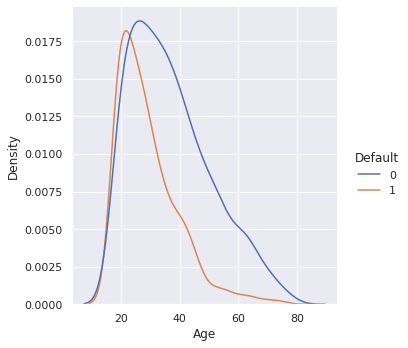

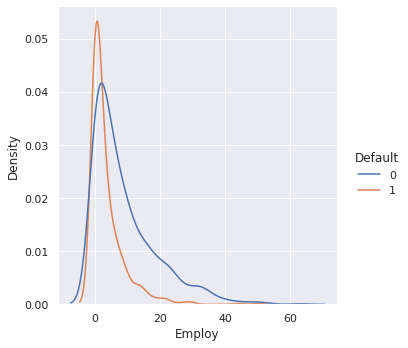

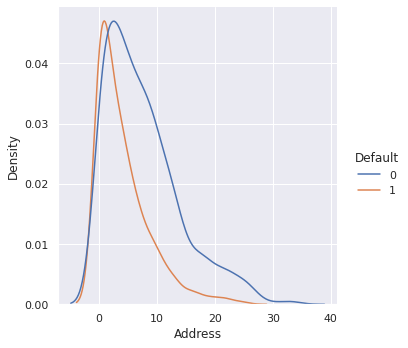

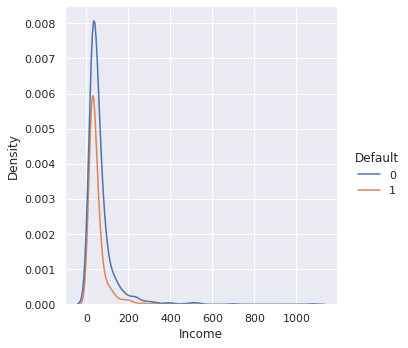

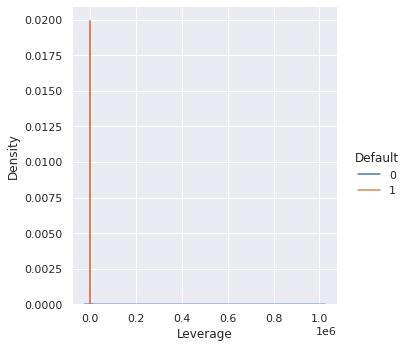

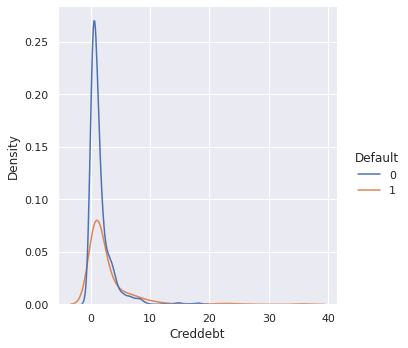

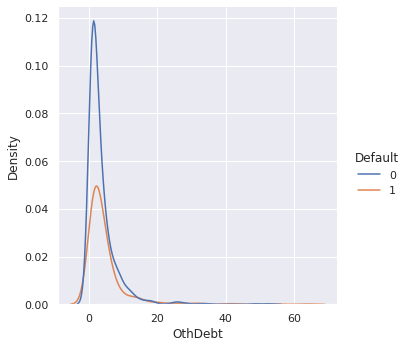

In [7]:
sns.set(color_codes=True)
for col_id in bankloan_data.columns[np.r_[1,3:9]]:
    sns.displot(data = bankloan_data, x = col_id, hue = "Default", kind = 'kde')

Seaborn puede hacer muchos gráficos sofisticados (y estéticamente agradables). Ve a [La Galería](https://seaborn.pydata.org/examples/index.html) para más detalles y código de ejemplo. 

Hay valores atípicos severos en OthDebt, Leverage, Creddebt e Income, pero no sabemos cuáles son válidos y cuáles no. Trataremos estos ahora.

## Limpieza de datos

Ahora podemos centrarnos en limpiar los datos. Comencemos con la parte fácil: eliminar valores nulos. **Recuerde verificar cuando un valor atípico es un valor faltante** (invalid outliers).

### Valores nulos

La función central aquí será la de Panda [```fillna```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). Esto permite reemplazar todos los valores nulos (representados por Ninguno o NaN en Python) por un valor determinado. Esto también permite establecer cuál será el reemplazo con el ```value``` argument. Vea la ayuda para más detalles.

Recuerde las estrategias para tratar:

1. Mantener: si los valores nulos son una categoría por sí mismos. En este caso, reemplácelo por algo significativo.

2. Eliminar: si los valores nulos son demasiados, **ya sea por fila o por columna**, es mejor descartar el caso o la variable.

3. Reemplazar: si solo faltan unos pocos para la variable o la fila (<1 % en total), reemplace los valores nulos por la **median** para las variables continuas y la **mode** para los valores categóricos.

Estudiemos los valores nulos de nuestro conjunto de datos. La función [```isnull()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) devuelve qué elementos en el marco de datos son nulos. La función [```any()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) devuelve una lista con las columnas (predeterminadas) o filas (que pasan ```axis = 1``` a la función) que tienen algún elemento con un valor booleano de verdadero.

In [8]:
bankloan_data.isnull().any()

customer       False
Age            False
Education      False
Employ         False
Address         True
Income          True
Leverage        True
Creddebt        True
OthDebt         True
MonthlyLoad    False
Default        False
dtype: bool

Podemos ver qué columnas tienen valores nulos. Vamos a estudiarlos con más detalle.

In [9]:
null_columns = bankloan_data.columns[bankloan_data.isnull().any()]
bankloan_data[null_columns].isnull().sum()

Address      1
Income       1
Leverage     1
Creddebt     1
OthDebt     11
dtype: int64

Dada la pequeña cantidad de casos para todas las variables excepto OthDebt, simplemente podemos reemplazar esos valores por la mediana.

Estudiemos los casos de OthDebt con más detalle.

In [10]:
bankloan_data.loc[bankloan_data.isnull().any(axis = 1), :]

,customer,Age,Education,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
17,10423,19,Bas,2,0.0,31.0,0.3,0.02,NaN,0.01,1
247,71896,20,SupInc,0,0.0,21.0,1.3,0.18,NaN,0.07,1
255,72327,19,Med,0,NaN,NaN,NaN,NaN,NaN,0.01,1
293,74471,39,Bas,8,9.0,41.0,0.1,0.03,NaN,0.00,0
587,244023,31,SupCom,1,7.0,69.0,0.4,0.19,NaN,0.01,0
745,315892,22,SupInc,0,1.0,14.0,2.5,0.26,NaN,0.20,0
748,315948,41,Med,21,9.0,64.0,0.3,0.12,NaN,0.01,0
817,335635,18,Med,0,0.0,24.0,0.9,0.13,NaN,0.05,1
1194,372485,20,SupInc,0,0.0,13.0,1.1,0.05,NaN,0.10,0
1254,376801,23,SupCom,0,2.0,19.0,1.4,0.18,NaN,0.09,0


Podemos ver todos los casos en los que OthDebt es nulo. También podemos ver el valor atípico atroz que tiene Leverage, con un valor de 9999999. Estos valores nos dan algunas pistas sobre lo que está sucediendo con OthDebt. Estudiemos el mínimo y el máximo de las variables.

In [11]:
bankloan_data.OthDebt.describe()

count    1489.000000
mean        3.872257
std         5.343150
min         0.100000
25%         1.120000
50%         2.240000
75%         4.610000
max        63.470000
Name: OthDebt, dtype: float64

¡Ajá! ¿Notas algo? ¡No hay valores iguales a 0! Podemos hacer una buena suposición de que los valores nulos son iguales a cero. En la vida real llamaríamos a los administradores de sistemas para confirmar esto, pero en este caso podemos adivinar.

Entonces, ahora deberíamos arreglar estos valores de la siguiente manera:

1. Reemplace el apalancamiento igual a 999999 por un valor nulo.
2. Reemplace todos los valores nulos de OthDebt por 0.
3. Reemplace los valores nulos restantes por la mediana.

In [12]:
# Reemplace valor atípico invalido.
bankloan_data.Leverage.values[bankloan_data.Leverage.values == 999999] = np.NaN

In [13]:
# Rellena los valores nulos con ceros. El argumento en lugar cambia el marco de datos.
bankloan_data.OthDebt.fillna(value = 0, inplace=True)

In [14]:
# Complete los elementos restantes.
bankloan_data.fillna(bankloan_data.median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [15]:
bankloan_data.describe()

,customer,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,257714.548000,34.174000,6.952000,6.308667,59.602000,9.940600,1.935567,3.843860,0.365447,0.365333
std,139555.147719,13.142306,8.977644,6.045640,67.124278,6.662313,2.973593,5.333758,0.293937,0.481684
min,10012.000000,18.000000,0.000000,0.000000,12.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,98638.750000,24.000000,0.000000,2.000000,27.000000,4.800000,0.420000,1.107500,0.150000,0.000000
50%,315991.500000,31.000000,4.000000,5.000000,40.000000,8.500000,0.990000,2.215000,0.290000,0.000000
75%,370701.500000,42.000000,10.000000,9.000000,64.000000,13.525000,2.200000,4.572500,0.500000,1.000000
max,453777.000000,79.000000,63.000000,34.000000,1079.000000,40.700000,35.970000,63.470000,2.150000,1.000000


¡No hay más valores nulos! Ahora estamos listos para estudiar las distribuciones.

### Limpieza de valores atípicos 
La limpieza de valores atípicos, por otro lado, requiere una intervención mucho más manual. Sabemos que hay tres variables en las que debemos intervenir: Ingresos (Income), Deuda crediticia (Creddebt) y Deuda alternativa (OthDebt). En general, nos gustaría modificar todos los casos en los que haya una distribución discontinua o un caso que esté fuera de 3 a 6 desviaciones estándar.

¡Es muy importante usar su juicio en esto! No se limite a cortar en 3 stds, ya que eso es demasiado restrictivo en una distribución exponencial. Si desea tener una idea de los valores, Seaborn puede ayudarlo. La función ```displot``` con la opción ```hist``` o ```kde``` permite comprobar la distribución de valores.

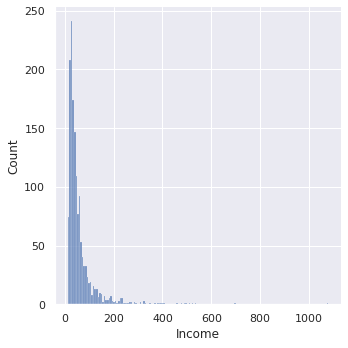

In [19]:
sns.displot(bankloan_data['Income'], kind = 'hist')

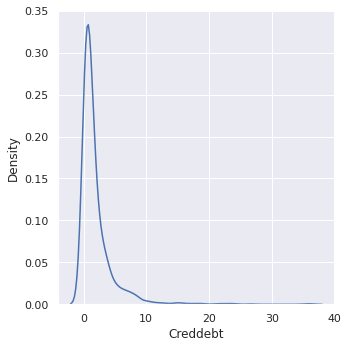

In [17]:
sns.displot(bankloan_data['Creddebt'], kind = 'kde')

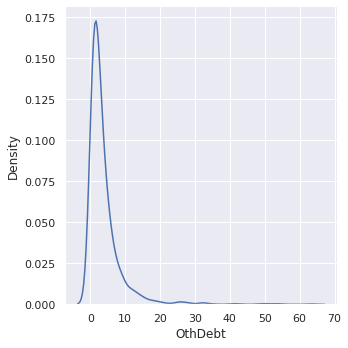

In [20]:
sns.displot(bankloan_data['OthDebt'], kind = 'kde')

Todas las variables deben recortarse desde la derecha. Los cortes potenciales son Income de 300, Creddebt de 15 y Othdebt de 30.

Para cortar realmente los valores, simplemente podemos escribir una expresión adecuada en Pandas:

In [22]:
bankloan_data = bankloan_data.loc[(bankloan_data['Income'] < 300) & (bankloan_data['Creddebt'] < 15) & (bankloan_data['OthDebt'] < 30)]

Podemos comprobar ahora cómo se ven los datos.

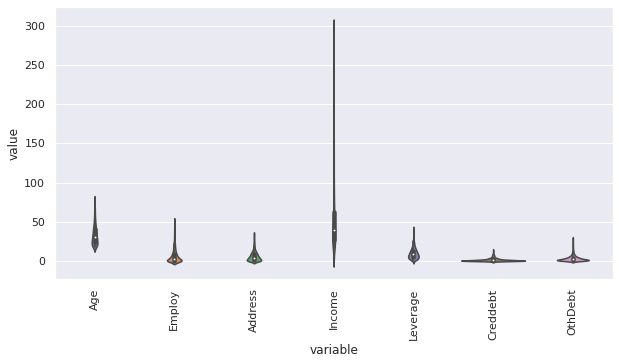

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(bankloan_data.iloc[:, np.r_[1,3:9]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

Mucho mejor, aunque los ingresos todavía tienen un gran valor atípico. Sin embargo, esta gráfica puede ser engañosa, ya que la magnitud de los datos es relevante. Es posible que deseemos volver a verificar esto después de normalizar los datos.

## Normalization
La mayoría de los modelos requieren que las entradas estén en la misma escala, esto se llama **normalización**. Es muy importante para la mayoría de los modelos... excepto para la calificación crediticia, ya que usaremos el peso de la evidencia (¡vea la lección!). Aún así, esto es bastante simple de hacer en Pandas, siendo inteligente sobre qué columnas seleccionamos y **asignando** una función a esas columnas.

El mapeo más tradicional es el zscore. Podemos usar la versión de scipy.

In [24]:
from scipy.stats import zscore

Ahora seleccionamos todas las columnas numéricas, excepto la del cliente. Podemos hacer esto con ```select_dtypes```.

In [25]:
# Identificar las columnas numéricas
numeric_cols = bankloan_data.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['customer', 'Age', 'Employ', 'Address', 'Income', 'Leverage',
       'Creddebt', 'OthDebt', 'MonthlyLoad', 'Default'],
      dtype='object')

In [26]:
# Remove the first and last one
numeric_cols = numeric_cols[1:-1]

In [28]:
# Aplicar la función zscore a todos los datos
bankloan_data[numeric_cols] = bankloan_data[numeric_cols].apply(zscore)

Ahora los datos deberían verse mucho mejor.

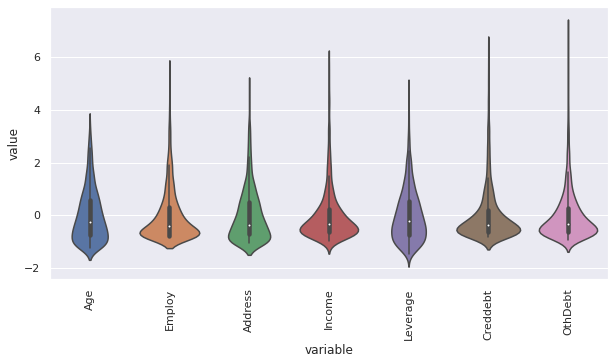

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(bankloan_data.iloc[:, np.r_[1,3:9]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

El conjunto de datos se ve realmente limpio ahora. ¡Estamos listos para usar más modelos! Para ser 100 % purista, **primero debe dividirse entre el entrenamiento y el conjunto de prueba** antes de realizar todos estos análisis (por lo que debe usar la mediana del conjunto del entrenamiento). Recuerde eso al resolver su trabajo de curso.

## Autoaprendizaje: Codificación *Dummy*
El paso final será transformar las variables categóricas en variables *dummies*. Una vez más, esto **no es necesario para la calificación crediticia** ya que la transformación WoE es mucho más robusta. La mejor estrategia aquí es seguir la regla del 5%:

1. Agregue según el juicio de expertos (es decir, su opinión) hasta que cada grupo tenga más del 5 % de los datos (1 % si los datos son muy grandes) y todas las clases (por variable objetivo) estén presentes.

2. Utilice el porcentaje de la variable objetivo (o árboles de clasificación) hasta que obtenga un número adecuado de grupos.

Para verificar el número de casos para cada nivel predeterminado, podemos calcular una tabla cruzada.

In [30]:
pd.crosstab(bankloan_data['Education'], bankloan_data['Default'])

Default,0,1
Education,,
Bas,180,64
Med,323,194
Posg,54,26
SupCom,166,132
SupInc,210,117


Ahora podemos calcular la media de cada nivel educativo.

In [31]:
bankloan_data.groupby('Education', as_index=False).agg({'Default': ["mean"]})

,Education,Default
,,mean
0,Bas,0.262295
1,Med,0.375242
2,Posg,0.325000
3,SupCom,0.442953
4,SupInc,0.357798


Si quisiéramos, podríamos agrupar algunos niveles educativos, como '1upInc', 'Med' y 'Posg'. Si no, podemos crear variables ficticias directamente con Pandasget_dummies

In [32]:
bankloan_data = pd.get_dummies(bankloan_data)
bankloan_data.describe()

,customer,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default,Education_Bas,Education_Med,Education_Posg,Education_SupCom,Education_SupInc
count,1466.000000,1.466000e+03,1.466000e+03,1.466000e+03,1.466000e+03,1.466000e+03,1.466000e+03,1.466000e+03,1.466000e+03,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000
mean,257292.708731,-3.483647e-16,-7.701888e-17,-4.793801e-17,7.883644e-17,-9.012042e-18,1.247297e-16,1.513872e-16,2.767984e-17,0.363574,0.166439,0.352660,0.054570,0.203274,0.223056
std,139836.339003,1.000341e+00,1.000341e+00,1.000341e+00,1.000341e+00,1.000341e+00,1.000341e+00,1.000341e+00,1.000341e+00,0.481192,0.372602,0.477961,0.227217,0.402572,0.416438
min,10012.000000,-1.231405e+00,-7.855789e-01,-1.040007e+00,-9.943516e-01,-1.486708e+00,-8.357286e-01,-9.249446e-01,-1.252944e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98156.750000,-7.594467e-01,-7.855789e-01,-6.978116e-01,-6.265193e-01,-7.565985e-01,-6.312230e-01,-6.300780e-01,-7.361277e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,316020.000000,-2.481589e-01,-4.202049e-01,-3.556166e-01,-3.322534e-01,-2.090163e-01,-3.618742e-01,-3.324811e-01,-2.362562e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,370670.750000,5.777675e-01,3.105429e-01,4.998707e-01,2.317561e-01,5.363039e-01,2.104922e-01,2.756813e-01,4.415356e-01,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,453777.000000,3.409515e+00,5.425778e+00,4.777307e+00,5.798285e+00,4.688802e+00,6.331944e+00,6.976389e+00,6.033318e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


¡Ahora estamos listos para aplicar modelos generales!

Versión original en inglés de [C. Bravo](https://github.com/CBravoR/AdvancedAnalyticsLabs).

Traducido/Adaptado por [R. Soto](https://github.com/rsotop).